# Principle Component Analysis

In [1]:
pwd

'C:\\Users\\Ahmad.Ramazanli\\Desktop\\data\\hws\\Machine Learning A-Z (Codes and Datasets)\\Part 9 - Dimensionality Reduction\\Section 43 - Principal Component Analysis (PCA)\\Python'

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Ahmad.Ramazanli\\Desktop\\data\\hws\\Machine Learning A-Z (Codes and Datasets)\\Part 9 - Dimensionality Reduction\\Section 43 - Principal Component Analysis (PCA)\\Python'

In [4]:
os.chdir("C:\\Users\\Ahmad.Ramazanli\\Desktop")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('examination.csv')
dataset

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,NaN,NaN,1.0,3.0,60.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9809,83728,1,124.0,NaN,110.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,1,679.0,NaN,NaN,1.0,4.0,80.0,1.0,1.0,...,1.0,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0
9811,83730,1,381.0,NaN,72.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset["BPXCHR"].isnull().sum()/len(dataset["BPXCHR"])

0.8001630490166106

#### Removing Nan columns which are above 30%

In [7]:
df=dataset[:].isnull().sum()/len(dataset[:])
df=df[df>0.3].sort_values(ascending=False)

In [8]:
df=pd.DataFrame(df).T

In [9]:
df.columns

Index(['BMIHEAD', 'BMIRECUM', 'CSQ260D', 'CSQ260I', 'OHX24CSC', 'OHX25CSC',
       'OHX26CSC', 'OHX23CSC', 'CSQ260A', 'MGD060',
       ...
       'BMDBMIC', 'CSXSMKOD', 'CSXSBOD', 'CSXCHOOD', 'CSAEFFRT', 'CSQ245',
       'CSXEXSTS', 'OHXIMP', 'MGDSEAT', 'MGD050'],
      dtype='object', length=113)

In [10]:
dataset=dataset.drop(df.columns,axis=1)

In [11]:
dataset

,SEQN,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,73557,1,620.0,1.0,4.0,86.0,1.0,1.0,140.0,122.0,...,P,P,P,P,P,P,P,P,P,P
1,73558,1,766.0,1.0,4.0,74.0,1.0,1.0,170.0,156.0,...,S,S,S,S,S,S,Z,S,E,E
2,73559,1,665.0,1.0,4.0,68.0,1.0,1.0,160.0,140.0,...,S,Z,S,S,S,S,S,Z,Z,E
3,73560,1,803.0,1.0,2.0,64.0,1.0,1.0,130.0,108.0,...,D,S,S,S,S,U,D,D,S,U
4,73561,1,949.0,1.0,3.0,92.0,1.0,1.0,170.0,136.0,...,S,Z,R,Z,S,Z,E,E,E,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,1.0,3.0,60.0,1.0,1.0,140.0,110.0,...,S,S,S,S,S,S,M,S,Z,S
9809,83728,1,124.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,D,D,D,D,D,D,D,U,U,U
9810,83729,1,679.0,1.0,4.0,80.0,1.0,1.0,150.0,136.0,...,S,S,S,S,S,S,S,S,E,Z
9811,83730,1,381.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,D,S,S,S,D,D,K,K,S,U


### changing nan values to mean

In [12]:
mean_value=dataset[:].mean()

dataset[:].fillna(value=mean_value, inplace=True)

C:\Users\Ahmad.Ramazanli\AppData\Local\Temp\ipykernel_6528\642667006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_value=dataset[:].mean()


In [13]:
dataset

,SEQN,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,73557,1,620.0,1.000000,4.000000,86.000000,1.0,1.000000,140.00000,122.000000,...,P,P,P,P,P,P,P,P,P,P
1,73558,1,766.0,1.000000,4.000000,74.000000,1.0,1.000000,170.00000,156.000000,...,S,S,S,S,S,S,Z,S,E,E
2,73559,1,665.0,1.000000,4.000000,68.000000,1.0,1.000000,160.00000,140.000000,...,S,Z,S,S,S,S,S,Z,Z,E
3,73560,1,803.0,1.000000,2.000000,64.000000,1.0,1.000000,130.00000,108.000000,...,D,S,S,S,S,U,D,D,S,U
4,73561,1,949.0,1.000000,3.000000,92.000000,1.0,1.000000,170.00000,136.000000,...,S,Z,R,Z,S,Z,E,E,E,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,1.000000,3.000000,60.000000,1.0,1.000000,140.00000,110.000000,...,S,S,S,S,S,S,M,S,Z,S
9809,83728,1,124.0,1.008096,3.675418,74.416214,1.0,1.004363,144.67364,118.123536,...,D,D,D,D,D,D,D,U,U,U
9810,83729,1,679.0,1.000000,4.000000,80.000000,1.0,1.000000,150.00000,136.000000,...,S,S,S,S,S,S,S,S,E,Z
9811,83730,1,381.0,1.008096,3.675418,74.416214,1.0,1.004363,144.67364,118.123536,...,D,S,S,S,D,D,K,K,S,U


In [14]:
dataset["PEASCST1"].unique()

array([1, 3, 2], dtype=int64)

In [15]:
dataset["BPAARM"].dtype

dtype('float64')

In [16]:
dataset.columns[0]

'SEQN'

In [17]:
int_cols = dataset.select_dtypes(include=["int64"])
float_cols=dataset.select_dtypes(include=["float64"])

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(float_cols)

In [19]:
standard_result=pd.DataFrame(X_train, columns=list(float_cols.columns))

In [20]:
dataset=pd.concat([int_cols, standard_result], axis=1)

In [21]:
dataset = dataset.rename(columns = {'SEQN' : 'ID', # https://wwwn.cdc.gov/nchs/nhanes/2013-2014/demo_h.htm
                                  'BMXARMC' : 'ArmCircum','PEASCST1' : 'Blood Pressure Status','BMXARML' : 'ARMLENGTH',
                                  'PEASCTM1' : 'Blood Pressure Time',
                                  'BPAARM': 'ARM SELECTED','BPACSZ' : 'CUFF SIZE IN CM', 'BPXPLS' : '60 sec. pulse (30 sec. pulse * 2)',
                                  'BPXPULS' : 'Pulse regular or irregular?', 'BPXPTY' : 'Puls Type','BMXWT' : 'Weight',   
                                   })

In [22]:
# Set the 'Name' column as the index
dataset.set_index('ID', inplace=True)

In [23]:
# Save the DataFrame to a CSV file
dataset.to_csv('examination-pca.csv', index = "ID")

In [24]:
dataset.columns.shape

(82,)

In [25]:
dataset

,Blood Pressure Status,BMDSTATS,Blood Pressure Time,ARM SELECTED,CUFF SIZE IN CM,60 sec. pulse (30 sec. pulse * 2),Pulse regular or irregular?,Puls Type,BPXML1,BPXSY1,...,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC
ID,,,,,,,,,,,,,,,,,,,,,
73557,1,1,-0.149700,-7.920862e-02,0.470941,1.067916,-0.119573,-0.075397,-0.145626,2.508377e-01,...,3.098938,3.158252,3.128901,3.058341,2.948271,2.387313,2.143468,1.423297,1.144574,0.462660
73558,1,1,0.388841,-7.920862e-02,0.470941,-0.038371,-0.119573,-0.075397,0.789142,2.450905e+00,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,-0.055570,-0.119481,1.423297,1.144574,0.462660
73559,1,1,0.016289,-7.920862e-02,0.470941,-0.591515,-0.119573,-0.075397,0.477553,1.415579e+00,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,-0.055570,-0.119481,-0.736454,1.144574,0.462660
73560,1,1,0.525320,-7.920862e-02,-2.430887,-0.960277,-0.119573,-0.075397,-0.457215,-6.550724e-01,...,-0.012142,-0.044281,-0.046742,-0.018700,2.948271,-1.277011,-1.250956,-0.736454,1.144574,0.462660
73561,1,3,1.063860,-7.920862e-02,-0.979973,1.621060,-0.119573,-0.075397,0.789142,1.156748e+00,...,-0.012142,3.158252,-0.046742,-0.018700,0.063215,2.387313,2.143468,1.423297,1.144574,0.462660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,1,1,-0.182897,-7.920862e-02,-0.979973,-1.329039,-0.119573,-0.075397,-0.145626,-5.256567e-01,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,2.387313,-0.119481,-0.736454,-0.926142,0.462660
83728,1,1,-1.979261,-2.172532e-15,0.000000,0.000000,-0.119573,0.000000,0.000000,-9.195541e-16,...,-1.567682,-1.645548,-1.634564,-1.557220,-1.379313,-1.277011,2.143468,1.423297,1.144574,0.462660
83729,1,1,0.067930,-7.920862e-02,0.470941,0.514773,-0.119573,-0.075397,0.165964,1.156748e+00,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,-0.055570,-0.119481,1.423297,-0.926142,-2.283293


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [27]:
print(pca.explained_variance_)
print(pca.components_)

[16.82580521  9.38378011]
[[ 1.36548871e-01  4.29460211e-03  1.12444015e-01 -3.81731979e-02
   1.87442381e-02  1.63848411e-03  5.23002409e-02  9.57956724e-02
   7.59210917e-02 -6.06372386e-04  9.90778080e-02  7.29818276e-02
   2.10698795e-03  9.82006409e-02  7.19936729e-02 -2.10089838e-03
   1.81938671e-01  1.83339096e-01  1.60920555e-01  7.09036030e-02
   1.58369703e-01  1.75710560e-01  1.87468293e-01  1.23800405e-01
   1.23838392e-01  1.23837457e-01  7.43121848e-03 -3.82876540e-02
  -3.16653651e-02  5.24587037e-03 -2.67231499e-03  2.71515578e-03
  -2.43203038e-03  1.25033015e-01  3.73146251e-03  1.26614061e-01
  -2.98790691e-03  1.27710334e-01 -4.24057459e-03  1.26898023e-01
  -8.11469304e-03  1.26990163e-01 -5.38092778e-03  1.27091224e-01
  -1.07206695e-02  1.29563958e-01  2.03477976e-02  8.26726635e-03
  -4.65625582e-02 -6.56370727e-02  2.03215820e-02  1.61840141e-01
   1.74260567e-01  1.77906075e-01  1.59085631e-01  1.58019148e-01
   1.57759586e-01  1.57375468e-01  1.80030086e-01 

In [28]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X_train)
print(X_train.shape)
print(X_trans.shape)

(9813, 80)
(9813, 47)


### By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 41%!

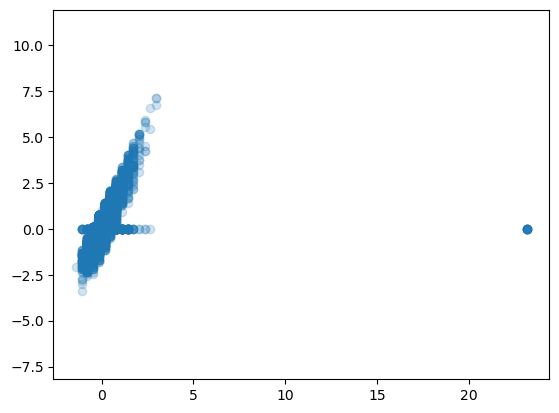

In [29]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X_train[:, 6], X_train[:, 7], 'o', alpha=0.2)
#plt.plot(X_new[:, 6], X_new[:, 7], 'o', alpha=0.9)
plt.axis('equal');

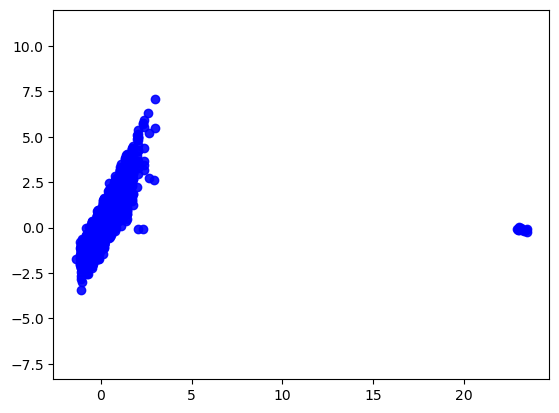

In [30]:
plt.plot(X_new[:, 6], X_new[:, 7], 'ob', alpha=0.9)
plt.axis('equal');

In [31]:
X_new[4]

array([ 1.06857739e+00, -7.31143144e-02, -1.14178153e+00,  1.62417561e+00,
       -1.29965127e-01, -6.63882966e-02,  7.51732252e-01,  1.15261440e+00,
        1.40315977e+00,  1.07467431e-01,  1.26925125e+00,  1.81859773e+00,
       -5.17597621e+00,  1.29385704e+00,  1.52087687e+00,  2.15890189e-01,
       -1.62014076e-01,  2.41004066e-03, -5.87053223e-01, -5.02125374e-01,
        4.35229722e-01, -2.31681921e-01, -1.36662681e-01, -3.85100784e-02,
       -2.96844399e-02, -3.47102237e-02, -2.93141970e-01,  3.81444051e-01,
        2.32097658e-01,  2.27633316e+00, -8.54686118e-02, -1.13309624e+00,
        1.17254744e+00, -1.44242358e+00, -1.70915120e-01, -1.34001068e+00,
       -2.22465927e-01, -1.48830086e+00, -1.33035748e-01, -1.36624416e+00,
       -1.29335423e-01, -1.53146753e+00, -1.47696855e-01, -1.39768827e+00,
       -1.52648424e-01, -1.47128568e+00, -2.08345200e-01, -3.03367046e-01,
        5.12698824e-01,  1.33154469e+00, -5.90595564e-01,  1.09817704e+00,
       -2.47242557e-01,  

In [57]:
column_names = pca.inverse_transform(standard_result)

ValueError: shapes (9813,80) and (2,80) not aligned: 80 (dim 1) != 2 (dim 0)

In [32]:
dataset=pd.concat([int_cols, X_new], axis=1)



TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [33]:
dataset

,Blood Pressure Status,BMDSTATS,Blood Pressure Time,ARM SELECTED,CUFF SIZE IN CM,60 sec. pulse (30 sec. pulse * 2),Pulse regular or irregular?,Puls Type,BPXML1,BPXSY1,...,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC
ID,,,,,,,,,,,,,,,,,,,,,
73557,1,1,-0.149700,-7.920862e-02,0.470941,1.067916,-0.119573,-0.075397,-0.145626,2.508377e-01,...,3.098938,3.158252,3.128901,3.058341,2.948271,2.387313,2.143468,1.423297,1.144574,0.462660
73558,1,1,0.388841,-7.920862e-02,0.470941,-0.038371,-0.119573,-0.075397,0.789142,2.450905e+00,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,-0.055570,-0.119481,1.423297,1.144574,0.462660
73559,1,1,0.016289,-7.920862e-02,0.470941,-0.591515,-0.119573,-0.075397,0.477553,1.415579e+00,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,-0.055570,-0.119481,-0.736454,1.144574,0.462660
73560,1,1,0.525320,-7.920862e-02,-2.430887,-0.960277,-0.119573,-0.075397,-0.457215,-6.550724e-01,...,-0.012142,-0.044281,-0.046742,-0.018700,2.948271,-1.277011,-1.250956,-0.736454,1.144574,0.462660
73561,1,3,1.063860,-7.920862e-02,-0.979973,1.621060,-0.119573,-0.075397,0.789142,1.156748e+00,...,-0.012142,3.158252,-0.046742,-0.018700,0.063215,2.387313,2.143468,1.423297,1.144574,0.462660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,1,1,-0.182897,-7.920862e-02,-0.979973,-1.329039,-0.119573,-0.075397,-0.145626,-5.256567e-01,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,2.387313,-0.119481,-0.736454,-0.926142,0.462660
83728,1,1,-1.979261,-2.172532e-15,0.000000,0.000000,-0.119573,0.000000,0.000000,-9.195541e-16,...,-1.567682,-1.645548,-1.634564,-1.557220,-1.379313,-1.277011,2.143468,1.423297,1.144574,0.462660
83729,1,1,0.067930,-7.920862e-02,0.470941,0.514773,-0.119573,-0.075397,0.165964,1.156748e+00,...,-0.012142,-0.044281,-0.046742,-0.018700,0.063215,-0.055570,-0.119481,1.423297,-0.926142,-2.283293


In [ ]:
dataset = dataset.rename(columns = {'SEQN' : 'ID', # https://wwwn.cdc.gov/nchs/nhanes/2013-2014/demo_h.htm
                                  'BMXARMC' : 'ArmCircum','PEASCST1' : 'Blood Pressure Status','BMXARML' : 'ARMLENGTH',
                                  'PEASCTM1' : 'Blood Pressure Time',
                                  'BPAARM': 'ARM SELECTED','BPACSZ' : 'CUFF SIZE IN CM', 'BPXPLS' : '60 sec. pulse (30 sec. pulse * 2)',
                                  'BPXPULS' : 'Pulse regular or irregular?', 'BPXPTY' : 'Puls Type','BMXWT' : 'Weight',   
                                   })

In [51]:
pd.DataFrame(pca.components_,columns=dataset.iloc[:,2:].columns)

,Blood Pressure Time,ARM SELECTED,CUFF SIZE IN CM,60 sec. pulse (30 sec. pulse * 2),Pulse regular or irregular?,Puls Type,BPXML1,BPXSY1,BPXDI1,BPAEN1,...,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC
0,0.136549,0.004295,0.112444,-0.038173,0.018744,0.001638,0.052300,0.095796,0.075921,-0.000606,...,0.157990,0.153665,0.153148,0.159799,0.171444,0.169886,0.159487,0.029277,-0.055759,-0.051060
1,-0.021475,0.013285,-0.124979,0.020507,0.018451,0.007478,0.011849,0.006816,-0.071129,0.000527,...,0.143411,0.144100,0.144013,0.143017,0.114828,0.101906,0.110281,0.114236,0.173214,0.107604
